In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

In [2]:
!gdown 1jTcZJ_8rLj1URc6MlPk_U4QiqqasRYej
data = pd.read_csv("predict+students+dropout+and+academic+success.csv")
data.head()

Downloading...
From: https://drive.google.com/uc?id=1jTcZJ_8rLj1URc6MlPk_U4QiqqasRYej
To: /content/predict+students+dropout+and+academic+success.csv
100% 444k/444k [00:00<00:00, 92.3MB/s]


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
#untuk mengetahui dimensi dari suatu objek data, biasanya array atau DataFrame.
data.shape

(4424, 35)

In [4]:
#digunakan untuk mendapatkan ringkasan informasi tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
#untuk menyesuaikan cara data ditampilkan dan diringkas
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,7.819,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,4.857,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,5.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,8.000,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,10.000,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,46.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [6]:
# periksa total nilai nol
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [7]:
# periksa apakah nilai diduplikasi
data.duplicated().sum()

np.int64(0)

/tmp/ipython-input-9-99702519.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=["Dropout", "Enrolled", "Graduate"], y=data_pie.values, palette="pastel")


AttributeError: 'NoneType' object has no attribute 'get_bbox'

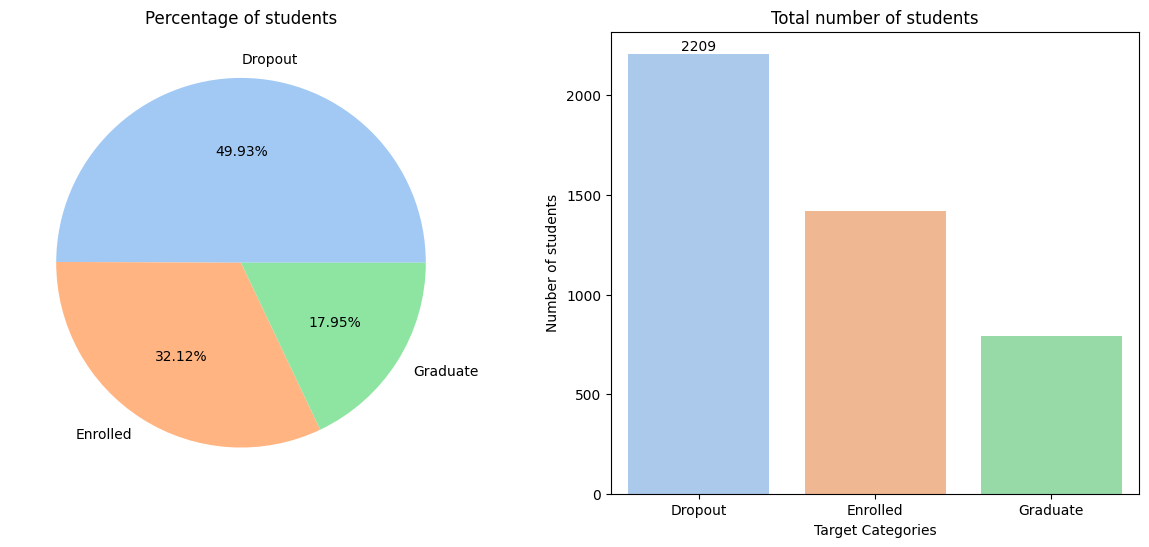

In [9]:
#Kode ini menghitung jumlah kemunculan (frekuensi)
data_pie = data['Target'].value_counts()

#Kode ini membuat dua subplot dalam satu gambar dengan ukuran total 15x6 inci.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#membuat pie chart
ax1.pie(data_pie,  autopct="%.2f%%", labels=["Dropout", "Enrolled", "Graduate"],colors=sns.color_palette('pastel'))
ax1.set_title('Percentage of students')

#embuat bar chart pada subplot kedua
ax2 = sns.barplot(x=["Dropout", "Enrolled", "Graduate"], y=data_pie.values, palette="pastel")
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')
ax2.bar_label(container=ax2.containers[0], labels=data_pie.values, fontsize=10, color='black')
plt.show()

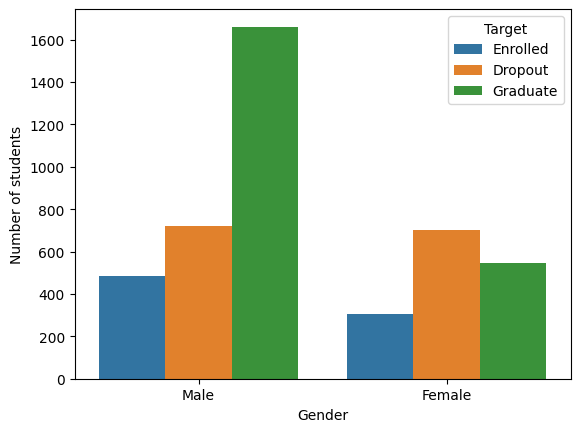

In [10]:
#membuat count plot
sns.countplot(data=data, x='Gender', hue='Target', order=[0, 1], hue_order=['Enrolled', 'Dropout', 'Graduate'])
#mengubah label pada sumbu x
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
#menetapkan label untuk sumbu y sebagai Number of students
plt.ylabel('Number of students')
#digunakan untuk menampilkan plot yang telah dibuat.
plt.show()

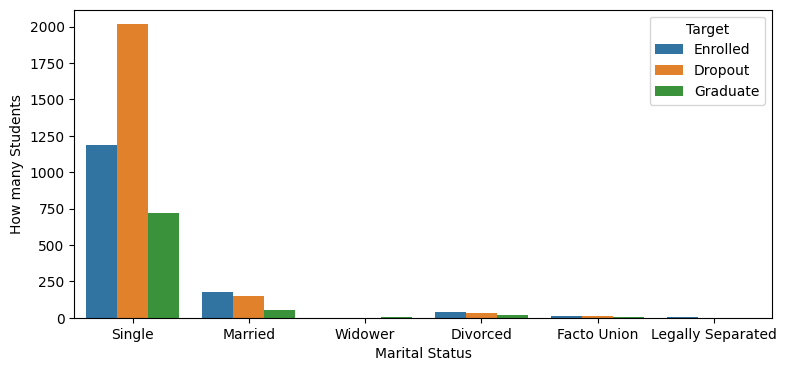

In [11]:
# Mengatur ukuran gambar
plt.figure(figsize=(9, 4))

# Membuat countplot untuk data dengan 'Marital status' sebagai x dan 'Target' sebagai hue
sns.countplot(data=data, x='Marital status', hue='Target')

# Mengatur label pada sumbu x untuk kategori status pernikahan
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])
plt.xlabel('Marital Status')  # Menambahkan label sumbu x
plt.ylabel('How many Students')  # Menambahkan label sumbu y

# Menambahkan legenda dengan judul 'Target' dan label kategori target
target_labels = ['Enrolled', 'Dropout', 'Graduate']
plt.legend(title='Target', labels=target_labels)

# Menampilkan plot
plt.show()


In [12]:
# Memfilter data untuk hanya menyertakan baris di mana 'Target' tidak sama dengan 'Enrolled'
data_filtered = data[data['Target'] != 'Enrolled']

# Menampilkan dimensi (jumlah baris dan kolom) dari data yang telah difilter
data_filtered.shape

(3630, 35)

/tmp/ipython-input-13-1293462592.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=labels, y=counts, palette="pastel")


AttributeError: 'NoneType' object has no attribute 'get_bbox'

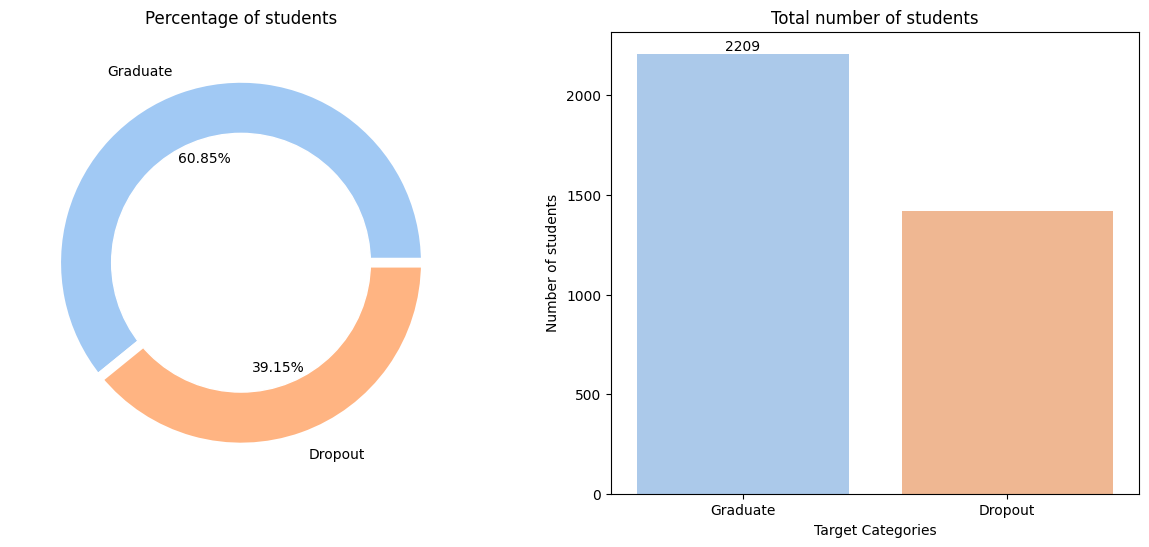

In [13]:
# Menghitung jumlah kemunculan setiap kategori dalam kolom 'Target' pada data yang telah difilter
data_counts = data_filtered['Target'].value_counts()

# Mendapatkan label dan jumlah untuk masing-masing kategori target
labels = data_counts.index
counts = data_counts.values

# Membuat figure dengan dua subplot (1 baris, 2 kolom)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Membuat lingkaran putih untuk ditempatkan di tengah pie chart agar terlihat seperti donut chart
circle = plt.Circle((0, 0), 0.7, color='white')

# Membuat pie chart di subplot pertama
ax1.pie(counts, labels=labels, autopct="%.2f%%", colors=sns.color_palette('pastel'), wedgeprops={'linewidth': 7, 'edgecolor': 'white'})
ax1.set_title('Percentage of students')  # Menambahkan judul pada pie chart
ax1.add_artist(circle)  # Menambahkan lingkaran putih di tengah pie chart

# Membuat barplot di subplot kedua
ax2 = sns.barplot(x=labels, y=counts, palette="pastel")
ax2.set(xlabel='Target Categories', ylabel='Number of students')  # Menambahkan label pada sumbu x dan y
ax2.set_title('Total number of students')  # Menambahkan judul pada barplot
ax2.bar_label(container=ax2.containers[0], labels=counts, fontsize=10, color='black')  # Menambahkan label jumlah di setiap batang

# Menampilkan plot
plt.show()

In [14]:
# Membuat salinan dari data yang telah difilter untuk diolah lebih lanjut
data_no_outliers = data_filtered.copy()

# Mengubah nilai pada kolom 'Target' menjadi nilai numerik
# 'Dropout' menjadi 0 dan 'Graduate' menjadi 1
data_no_outliers['Target'] = data_no_outliers['Target'].map({
    'Dropout': 0,
    'Graduate': 1
})


In [15]:
data_no_outliers.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [16]:
data_no_outliers.shape

(3630, 35)

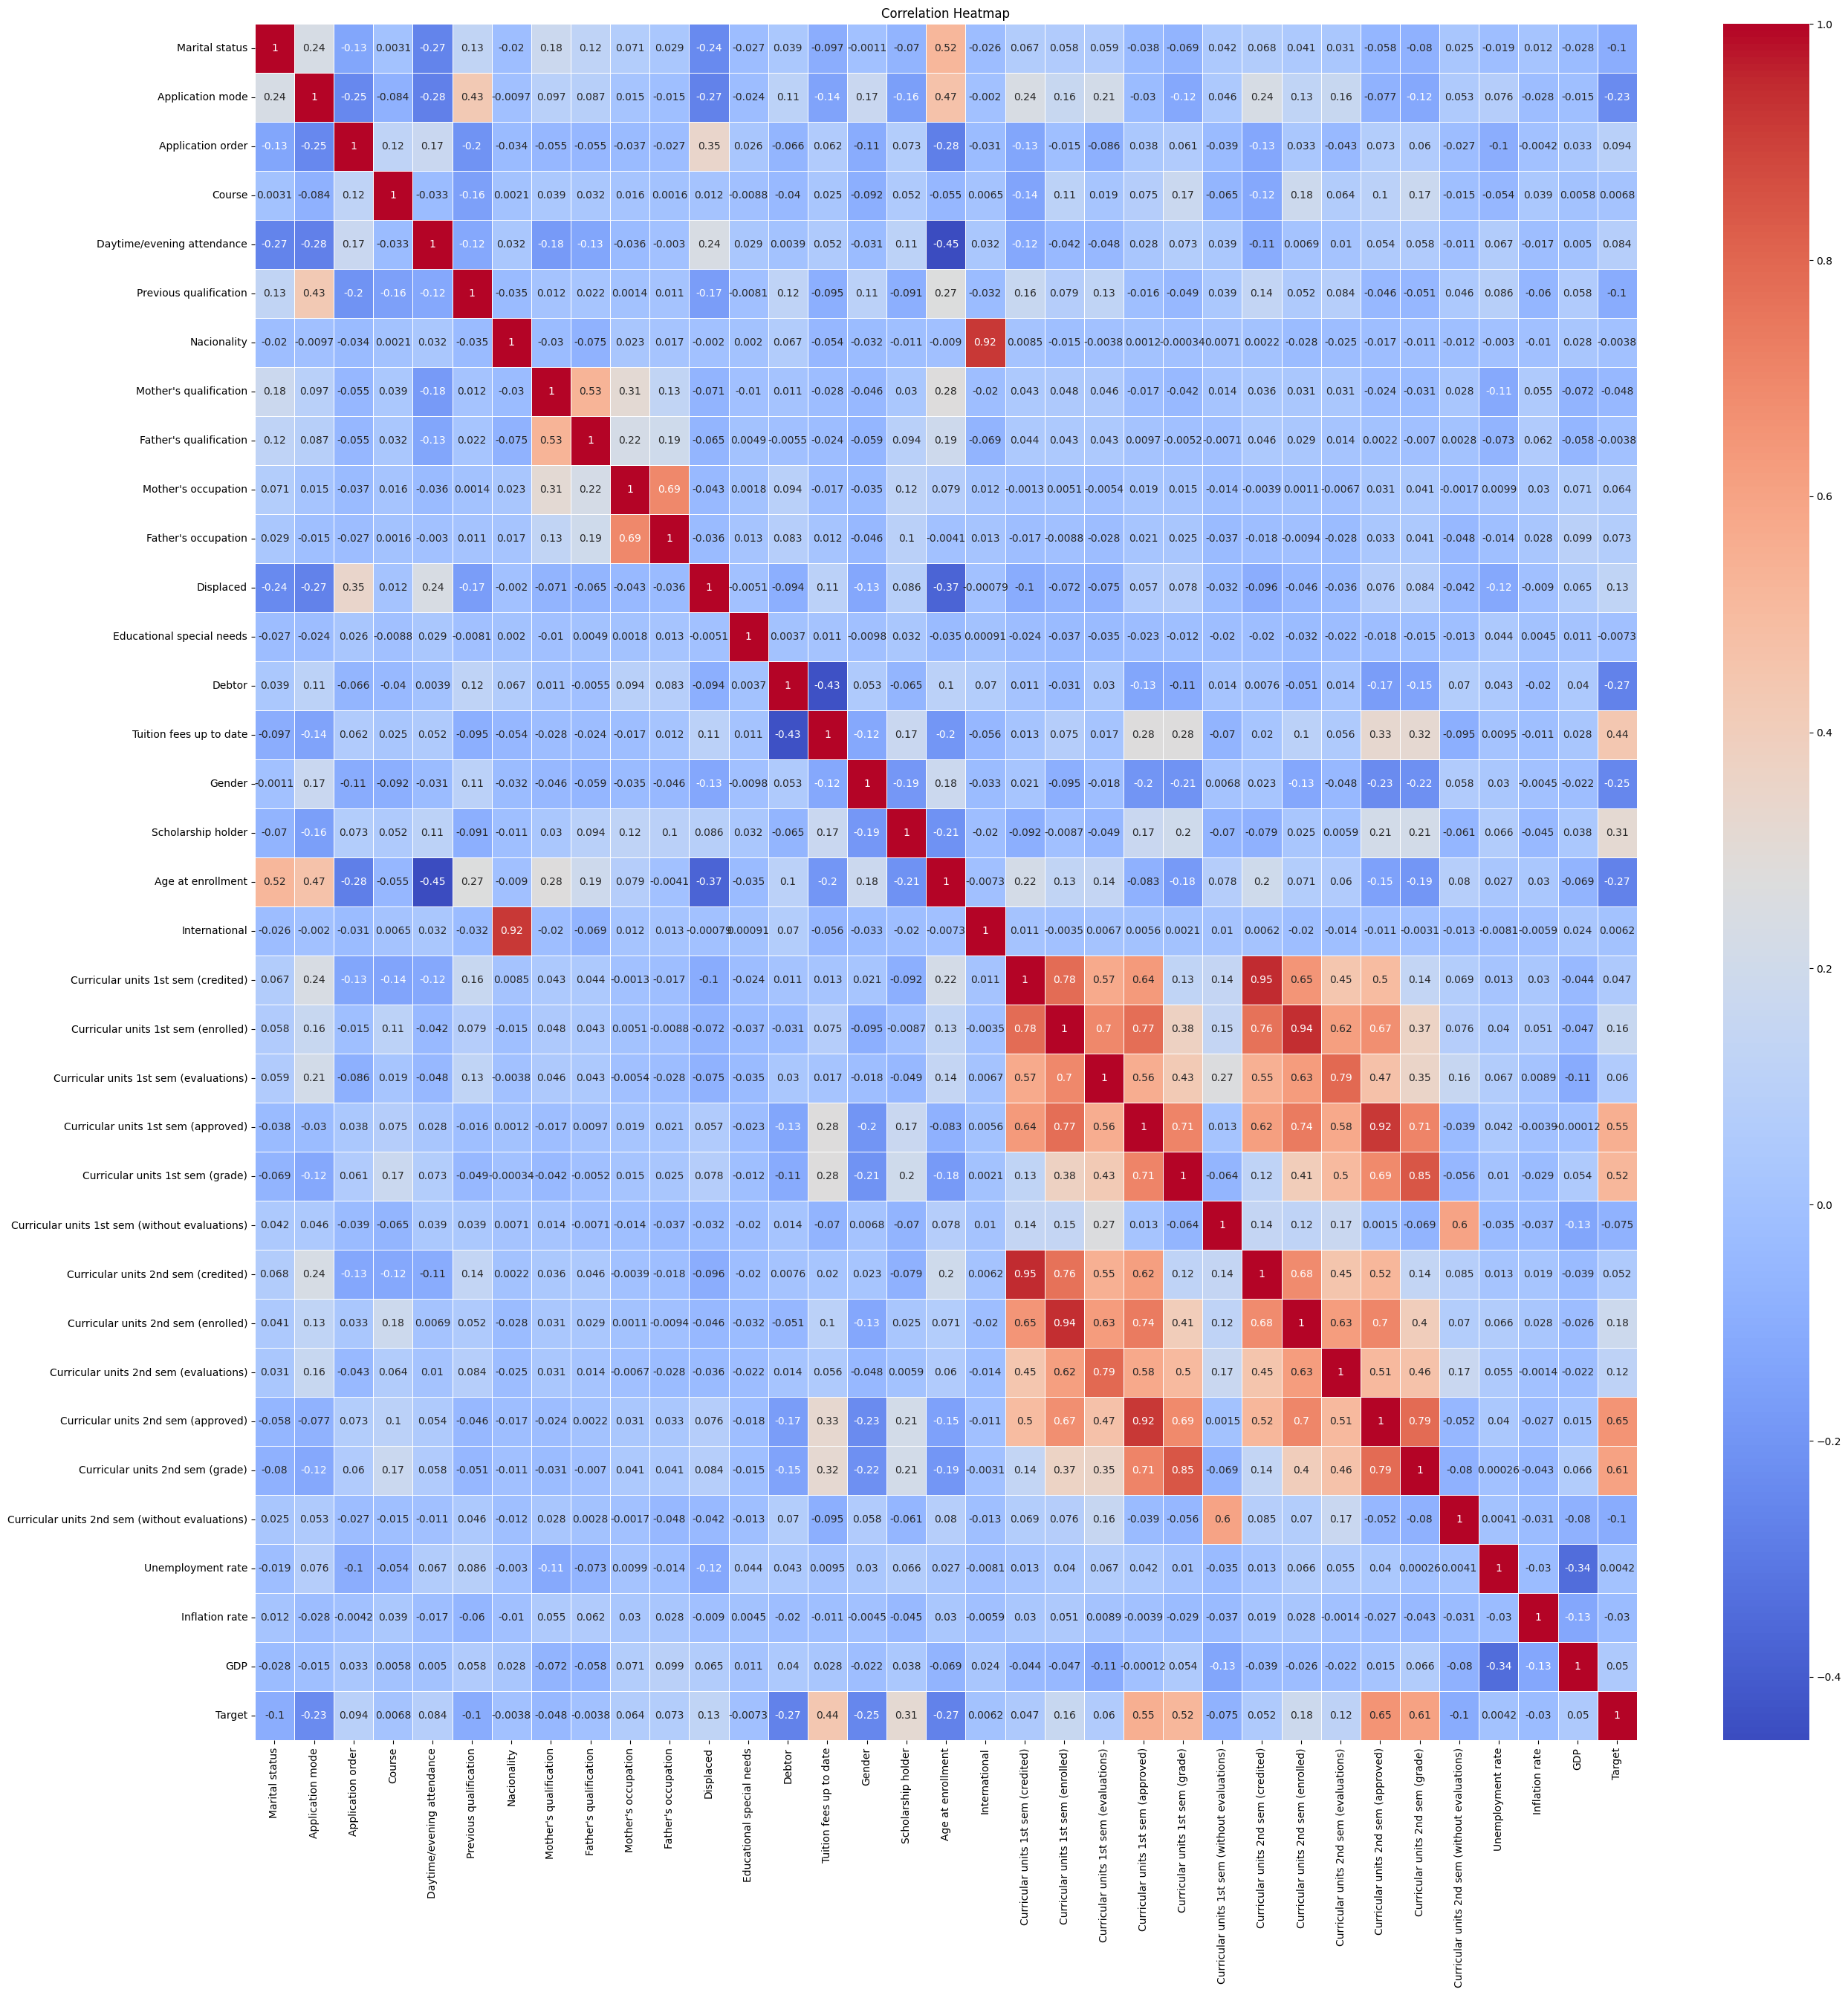

<Figure size 640x480 with 0 Axes>

In [17]:
# Mengatur ukuran gambar
plt.figure(figsize=(30, 30))

# Membuat heatmap untuk menampilkan korelasi antara kolom-kolom pada data_no_outliers
# annot=True untuk menampilkan nilai korelasi pada setiap sel
# cmap='coolwarm' untuk memilih skema warna coolwarm
# linewidths=0.5 untuk mengatur lebar garis pemisah antar sel
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul pada heatmap
plt.title('Correlation Heatmap')

# Menampilkan plot
plt.show()
plt.savefig('heatmap.png')


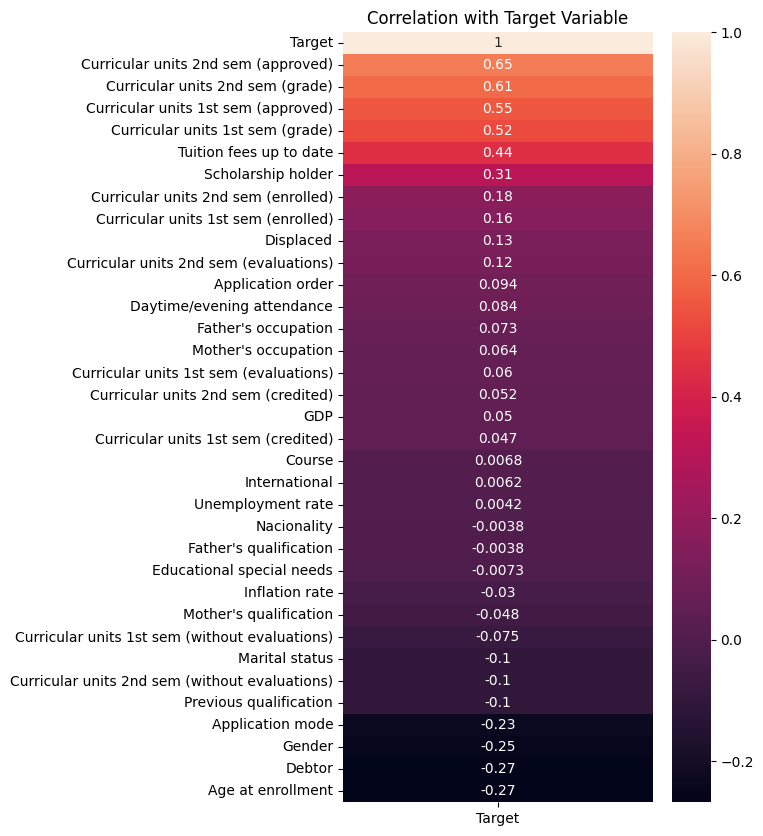

In [19]:
# Membuat salinan dari data_no_outliers untuk diolah lebih lanjut
data_2 = data_no_outliers.copy()

# Mengubah kategori menjadi angka numerik agar bisa menghitung korelasi antara variabel numerik dengan variabel target
data_2.replace("Dropout", 0, inplace=True)
data_2.replace("Enrolled", 1, inplace=True)
data_2.replace("Graduate", 2, inplace=True)

# Mengatur ukuran gambar
plt.figure(figsize=(5, 10))

# Membuat heatmap untuk menampilkan korelasi antara variabel-variabel dengan variabel 'Target'
# Mengurutkan nilai korelasi berdasarkan kolom 'Target' secara descending
sns.heatmap(data_2.corr()[['Target']].sort_values(by='Target', ascending=False), annot=True)

# Menambahkan judul pada heatmap
plt.title('Correlation with Target Variable')
plt.savefig('heatmap2.png')
# Menampilkan plot
plt.show()



In [21]:
data_no_outliers.shape

(3630, 35)

/tmp/ipython-input-22-3234263543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-22-3234263543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-22-3234263543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-22-3234263543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is depr

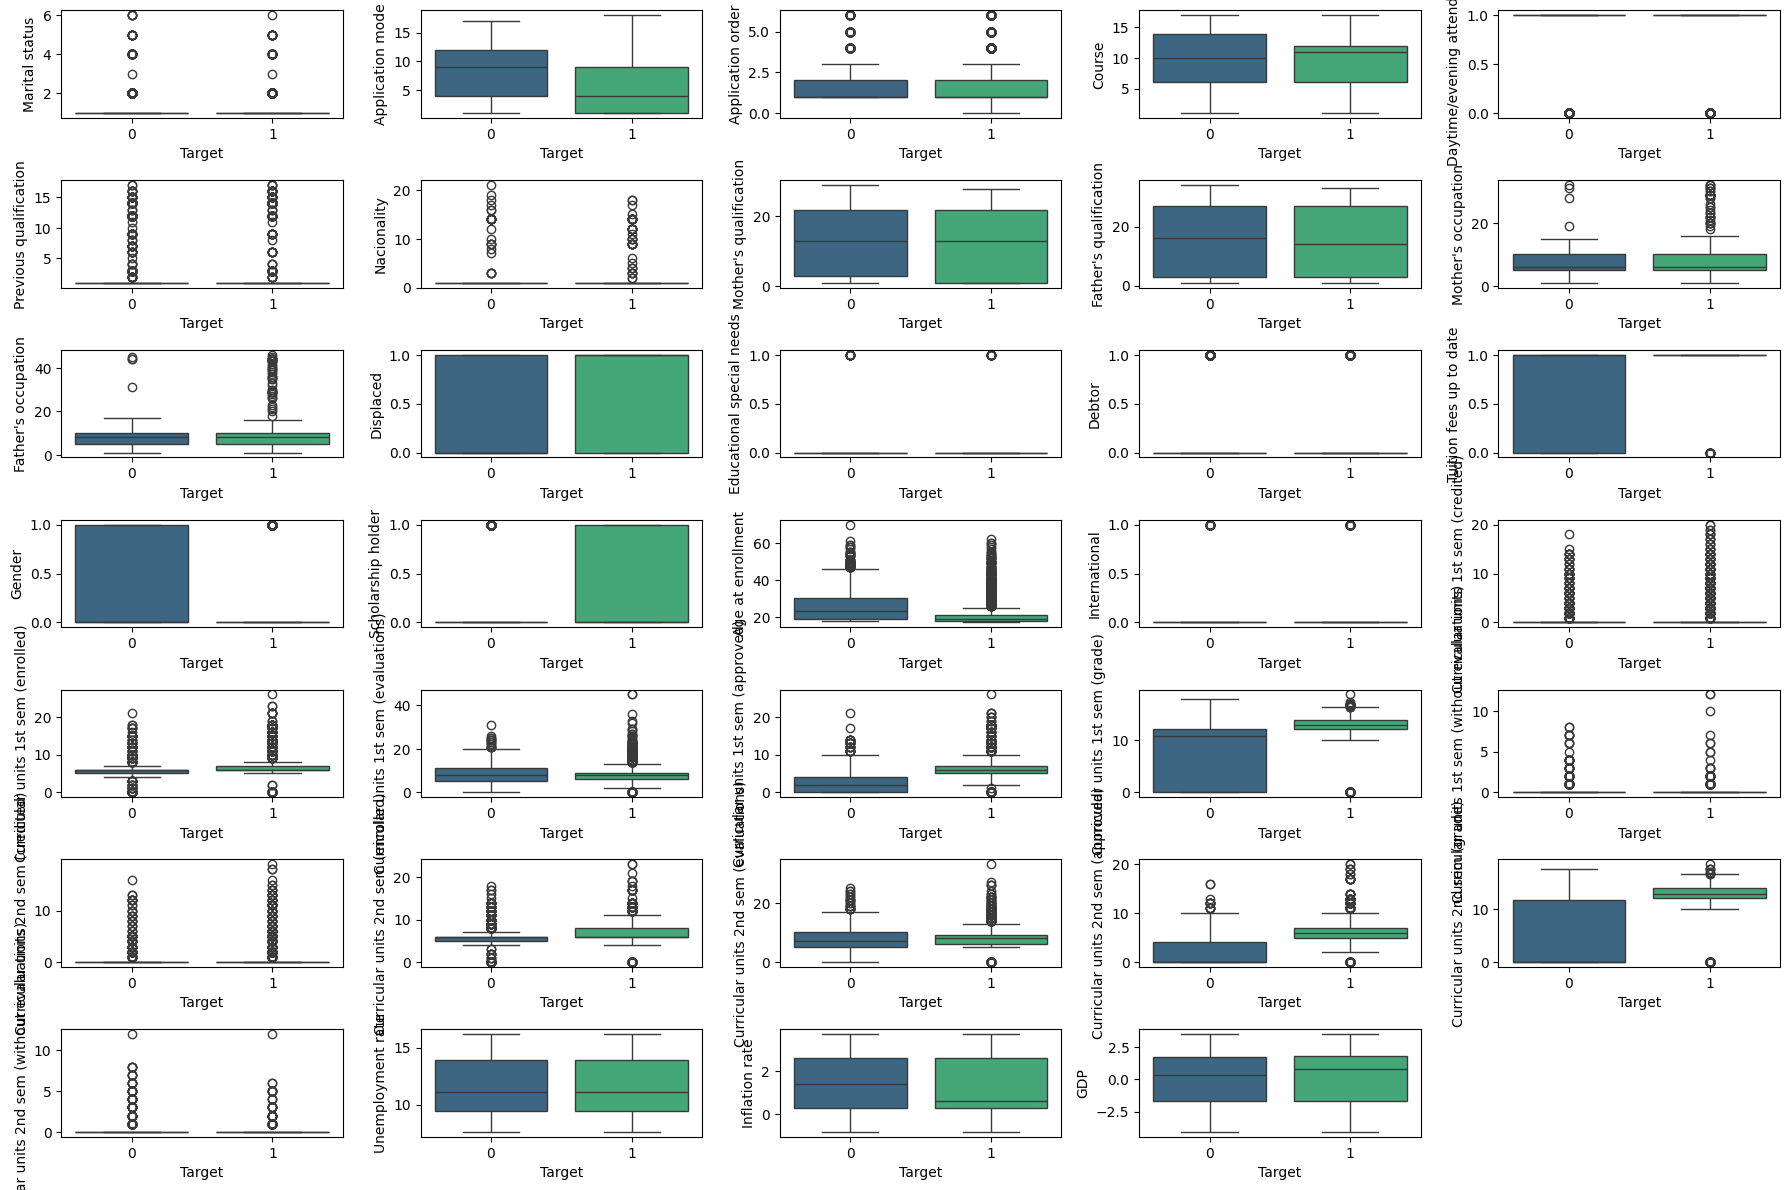

In [22]:
# Mengatur ukuran gambar
plt.figure(figsize=(18, 12))

# Membuat grid dengan 7 baris dan 5 kolom untuk subplot
gs = GridSpec(7, 5)

# Looping melalui setiap kolom di data_no_outliers, kecuali kolom terakhir (kolom 'Target')
for i, col in enumerate(data_no_outliers.columns[:-1]):
    # Membuat subplot pada grid yang telah ditentukan
    ax = plt.subplot(gs[i])

    # Membuat boxplot untuk setiap kolom terhadap 'Target'
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')

    # Mengatur label pada sumbu x dan y untuk setiap subplot
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

# Mengatur tata letak agar subplot tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

In [23]:
data.shape

(4424, 35)

In [24]:
data_no_outliers.shape

(3630, 35)

In [25]:
# Memisahkan fitur (X) dan target (y) dari data_no_outliers
X = data_no_outliers.drop('Target', axis=1)
y = data_no_outliers['Target']

# Membagi data menjadi set pelatihan dan set pengujian dengan proporsi 67% pelatihan dan 33% pengujian
# random_state=42 untuk memastikan pembagian data yang konsisten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Membuat daftar nama kolom dari data pelatihan
Names = list(X_train.columns.values)

# Membuat objek StandardScaler untuk standarisasi fitur
scaler = StandardScaler()

# Melakukan fit dan transformasi pada data pelatihan
X_train = scaler.fit_transform(X_train)

# Melakukan transformasi pada data pengujian
X_test = scaler.transform(X_test)

In [26]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (2432, 34)
X_test :  (1198, 34)
y_train :  (2432,)
y_test :  (1198,)


In [27]:
print("\nCounts of targets in y_train:")
print("Target 0:", sum(y_train == 0))
print("Target 1:", sum(y_train == 1))


Counts of targets in y_train:
Target 0: 954
Target 1: 1478


In [28]:
algorithms = ['Random Forest', 'SVM']
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Fungsi untuk menambahkan metrik evaluasi ke dalam list yang telah didefinisikan
def append_metrics(accuracy, precision, recall, f1):
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90


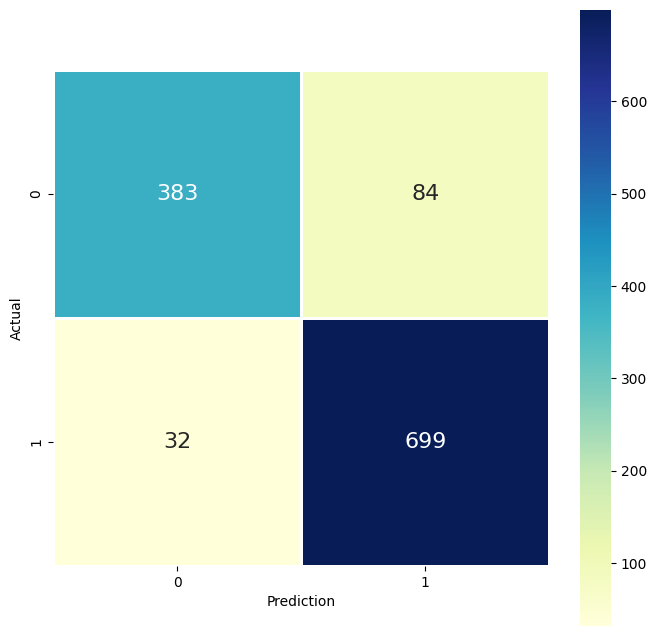

In [29]:
# Grid Search untuk mencari parameter terbaik
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik yang telah ditemukan
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Membuat model RandomForestClassifier dengan parameter terbaik dan melatihnya
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = best_rf.predict(X_test)

# Menghitung metrik evaluasi: akurasi, presisi, recall, dan F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Menyimpan metrik evaluasi menggunakan fungsi append_metrics yang telah didefinisikan sebelumnya
append_metrics(accuracy, precision, recall, f1)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Menampilkan matriks confusion dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.savefig('Random Forest.png')
plt.show()

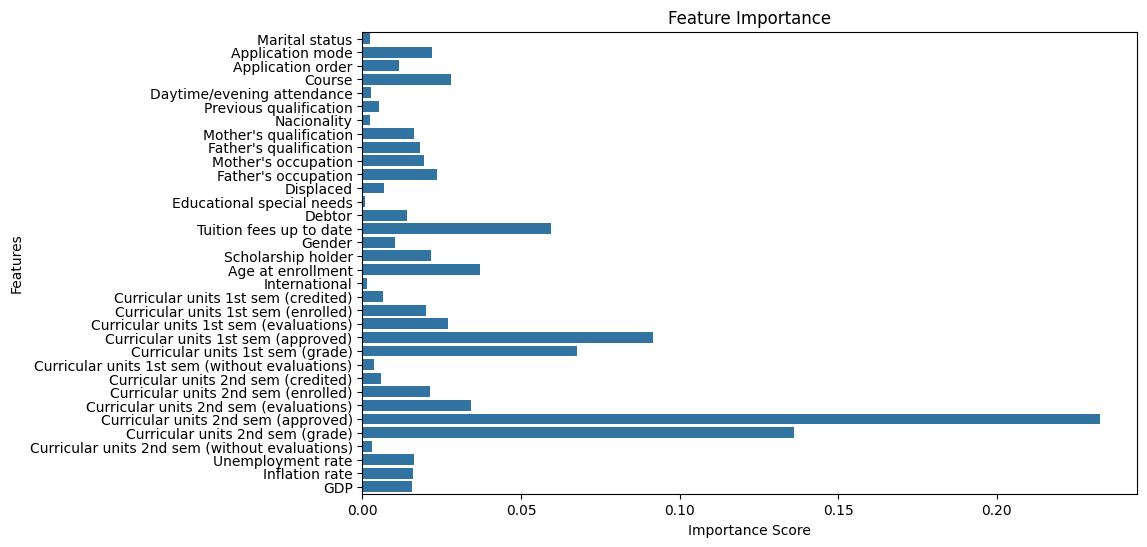

In [ ]:
# Mengambil tingkat kepentingan fitur dari model RandomForestClassifier yang telah dilatih
feature_importances = best_rf.feature_importances_

# Membuat plot menggunakan seaborn untuk menampilkan tingkat kepentingan fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   1.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   1.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.858 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.844 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.891 total time=   1.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.846 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.848 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

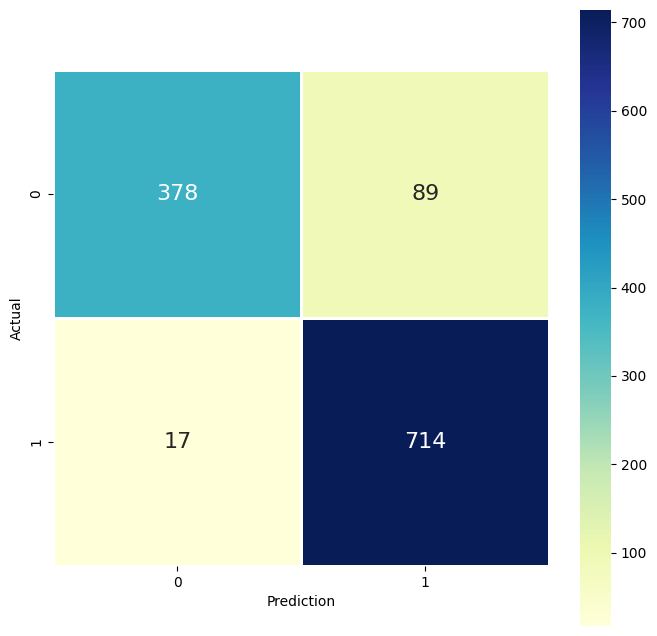

In [30]:
# Definisi model SVC
svcC = SVC()

# Grid Search untuk mencari parameter terbaik
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(svcC, param_grid, cv=5, scoring='accuracy', refit=True, verbose=3)
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik yang telah ditemukan
best_params_SVC = grid_search.best_params_
print("Best Parameters:", best_params_SVC)

# Membuat model SVC dengan parameter terbaik dan melatihnya
best_svcC = SVC(gamma=best_params_SVC['gamma'], kernel=best_params_SVC['kernel'], C=best_params_SVC['C'])
best_svcC.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = best_svcC.predict(X_test)

# Menghitung metrik evaluasi: akurasi, presisi, recall, dan F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Menyimpan metrik evaluasi menggunakan fungsi append_metrics yang telah didefinisikan sebelumnya
append_metrics(accuracy, precision, recall, f1)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Menampilkan matriks confusion dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.savefig('SVC.png')
plt.show()

In [33]:
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1_scores
})

In [40]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df



,Algorithm,Accuracy,Precision,Recall,F1
1,SVM,0.911519,0.915594,0.911519,0.90990
0,Random Forest,0.903172,0.904482,0.903172,0.90198


In [ ]:
results_df.to_csv("results_table.csv", index=False)
